In [1]:
# use CEASELESS kernel for adrien laptop notebook

import os
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import cartopy.crs as ccrs # => to add in Seastar env

from scipy import interpolate, stats # => to add in Seastar env ?

import seastar as ss

In [2]:
folder = 'unrestricted/'
aux_data_folder = "~/OneDrive/OneDrive - NOC/Documents/NOC-OneDrive/workLocal/SEASTAR/DATA/aux_data/"

In [43]:
list17 = {}
list17['F1'] = 'MARC_F1-MARS3D-MANGAE2500_SEASTAREX_20220517.nc'
list17['L1'] = 'MARC_L1-MARS2D-FINIS250_SEASTAREX_20220517.nc'
list17['W3'] = 'WW3_NORGAS-UG_SEASTAREX_20220517.nc'
list17['MF'] = 'restricted/METEOFRANCE_AROME/METEOFRANCE_AROME_SEASTAREX_20220517.nc'

## Mars3D F1 North-East Atlantic

In [4]:
F1 = xr.open_dataset(
    aux_data_folder + folder + list17['F1']
)

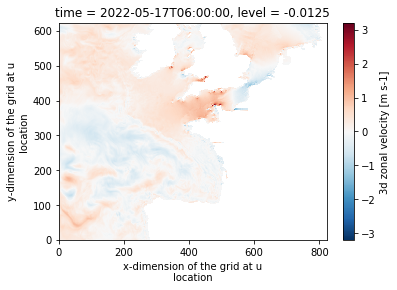

In [5]:
F1.UZ.isel(time=0,level=-1).plot()

## Mars2D L1 Finistere

In [4]:
L1 = xr.open_dataset(
    aux_data_folder + folder + list17['L1']
)

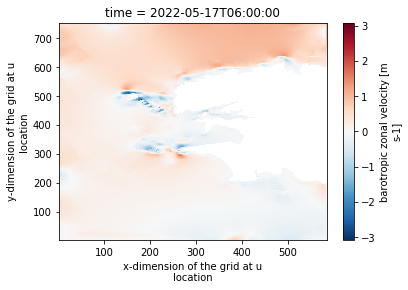

In [5]:
L1.U.isel(time=0).plot()

In [40]:
L1

<xarray.Dataset>
Dimensions:      (level: 1, ni: 584, ni_f: 584, ni_u: 584, ni_v: 584, nj: 754, nj_f: 754, nj_u: 754, nj_v: 754, time: 16)
Coordinates:
  * ni           (ni) float32 1.0 2.0 3.0 4.0 5.0 ... 581.0 582.0 583.0 584.0
  * nj           (nj) float32 1.0 2.0 3.0 4.0 5.0 ... 751.0 752.0 753.0 754.0
  * ni_u         (ni_u) float32 1.5 2.5 3.5 4.5 5.5 ... 581.5 582.5 583.5 584.5
  * nj_u         (nj_u) float32 1.0 2.0 3.0 4.0 5.0 ... 751.0 752.0 753.0 754.0
  * ni_v         (ni_v) float32 1.0 2.0 3.0 4.0 5.0 ... 581.0 582.0 583.0 584.0
  * nj_v         (nj_v) float32 1.5 2.5 3.5 4.5 5.5 ... 751.5 752.5 753.5 754.5
  * ni_f         (ni_f) float32 1.5 2.5 3.5 4.5 5.5 ... 581.5 582.5 583.5 584.5
  * nj_f         (nj_f) float32 1.5 2.5 3.5 4.5 5.5 ... 751.5 752.5 753.5 754.5
    latitude     (nj, ni) float64 47.34 47.34 47.34 47.34 ... 49.03 49.03 49.03
    longitude    (nj, ni) float64 -5.629 -5.625 -5.622 ... -3.671 -3.668 -3.664
  * time         (time) datetime64[ns] 2022-05-17T06:00:00 ... 2022-05-17T09:...
  * level        (level) float32 -0.5
    longitude_u  (nj_u, ni_u) float32 ...
    longitude_v  (nj_v, ni_v) float32 ...
    latitude_u   (nj_u, ni_u) float32 ...
    latitude_v   (nj_v, ni_v) float32 ...
Data variables:
    SIG          (level) float32 -0.5
    H0           (nj, ni) float32 ...
    HX           (nj_u, ni_u) float32 ...
    HY           (nj_v, ni_v) float32 ...
    XE           (time, nj, ni) float32 ...
    U            (time, nj_u, ni_u) float32 nan nan nan ... -0.8069094 0.0
    V            (time, nj_v, ni_v) float32 nan 0.0 ... -0.12207404 0.0
    DELTA_XE     (time, nj, ni) float32 ...
    DELTA_U      (time, nj_u, ni_u) float32 ...
    DELTA_V      (time, nj_v, ni_v) float32 ...
    cvel         (time, nj, ni) float32 nan nan nan ... 0.81618273 0.8160912 0.0
    cdir         (time, nj, ni) float32 nan nan nan ... 261.35483 261.3972 90.0
    U_c          (time, nj, ni) float32 nan nan nan ... -0.8069094 0.0
    V_c          (time, nj, ni) float32 nan 0.0 -0.56337166 ... -0.12207404 0.0
Attributes:
    limi:                    0
    lima:                    583
    pasi:                    1
    ljmi:                    0
    ljma:                    10
    pasj:                    1
    lkmi:                    1
    lkma:                    1
    pask:                    1
    global_imin:             0
    global_imax:             583
    global_jmin:             0
    global_jmax:             753
    Conventions:             CF-1.6 OCO-1.3.1 COMODO-1.0
    product_version:         1.0
    references:              http://www.previmer.org/
    easting:                 longitude
    northing:                latitude
    grid_projection:         n/a
    distribution_statement:  Data restrictions: for registered users only
    institution:             IFREMER
    institution_references:  http://www.ifremer.fr/
    data_centre:             IFREMER OCO DATA CENTER
    data_centre_references:  http://www.previmer.org/
    creation_date:           2022-05-23T08:38:17Z
    run_time:                2022-05-23T08:38:17Z
    history:                 2022-05-23T08:38:17Z: creation
    model_name:              MARS
    arakawa_grid_type:       C1
    source:                  MARS2D V9.06
    southernmost_latitude:   47.3367
    northernmost_latitude:   49.0332
    latitude_resolution:     2.253000000000000E-003
    westernmost_longitude:   -5.6286
    easternmost_longitude:   -3.6644
    longitude_resolution:    3.369100000000000E-003
    minimum_depth:           -5.4126
    maximum_depth:           197.6042
    depth_resolution:        n/a
    forecast_range:          4-days forecast
    forecast_type:           forecast
    operational_status:      operational
    data_type:               OCO oriented grid
    format_version:          1.3
    netcdf_version:          4.1.2
    software_version:        MARC forecasting system v2
    contact:                 cdoco-exploit@ifremer.fr
    quality_index:     

In [7]:
cvel, cdir = ss.utils.tools.currentUV2VelDir(L1.U.data, L1.V.data)

In [23]:
L1['cvel'] = ( ('time','nj','ni'), cvel )
L1['cdir'] = ( ('time','nj','ni'), cdir )
L1['U_c'] = ( ('time','nj','ni'), L1.U.data)
L1['V_c'] = ( ('time','nj','ni'), L1.V.data)

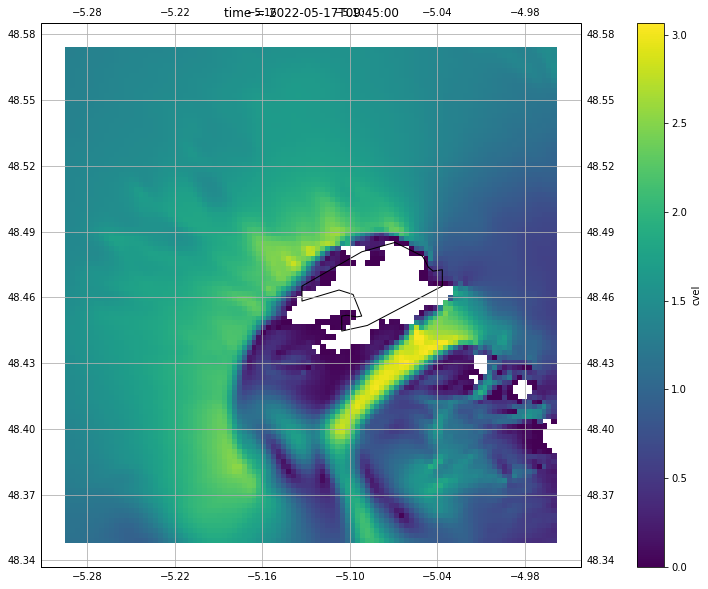

In [39]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
L1.cvel\
    .isel(time=15)\
    .sel(ni=slice(100,200), nj=slice(450,550))\
    .plot(
        x='longitude', y='latitude',
        transform=ccrs.PlateCarree(),
)
ax.coastlines(resolution='10m')
gl=ax.gridlines(draw_labels=True)

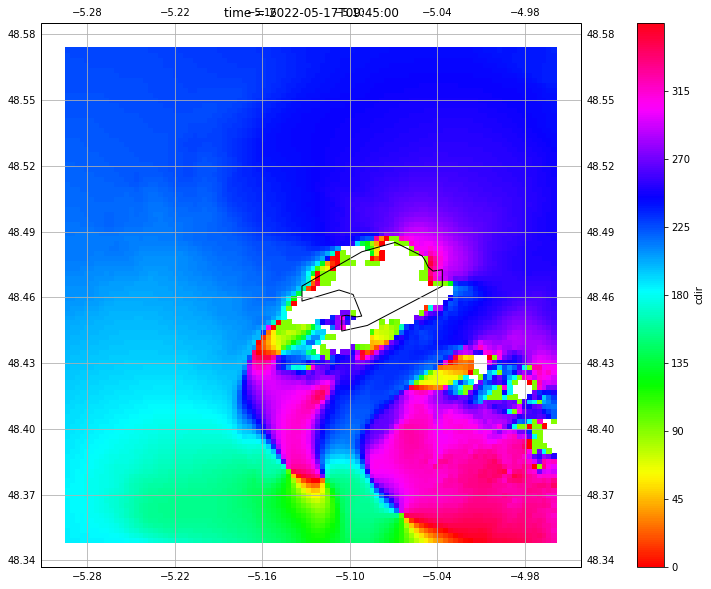

In [38]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
L1.cdir\
    .isel(time=15)\
    .sel(ni=slice(100,200), nj=slice(450,550))\
    .plot(
        x='longitude', y='latitude',
        transform=ccrs.PlateCarree(),
        cmap='hsv',
        cbar_kwargs={'ticks': np.arange(0,361,45)}
)
ax.coastlines(resolution='10m')
gl=ax.gridlines(draw_labels=True)

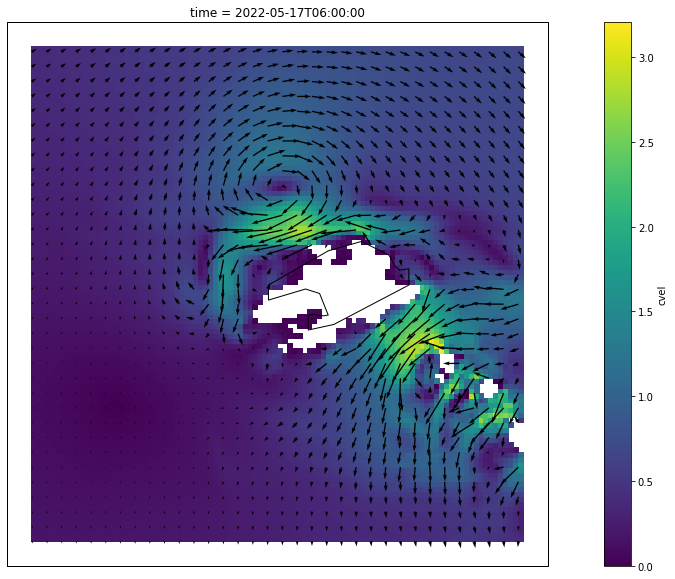

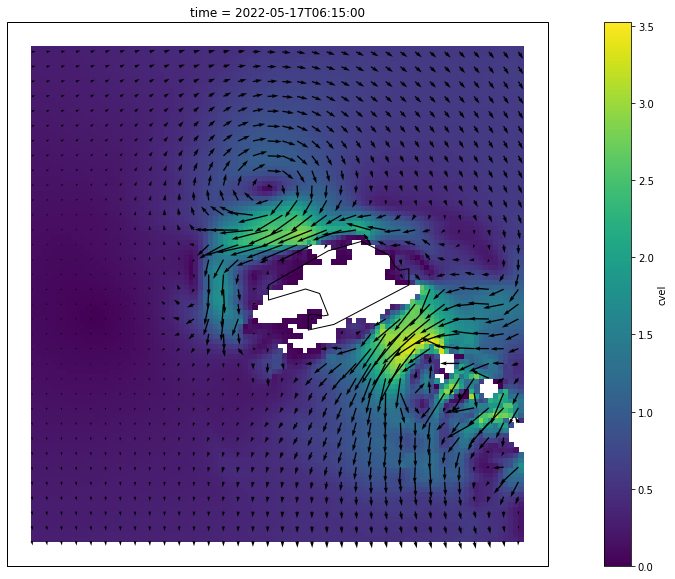

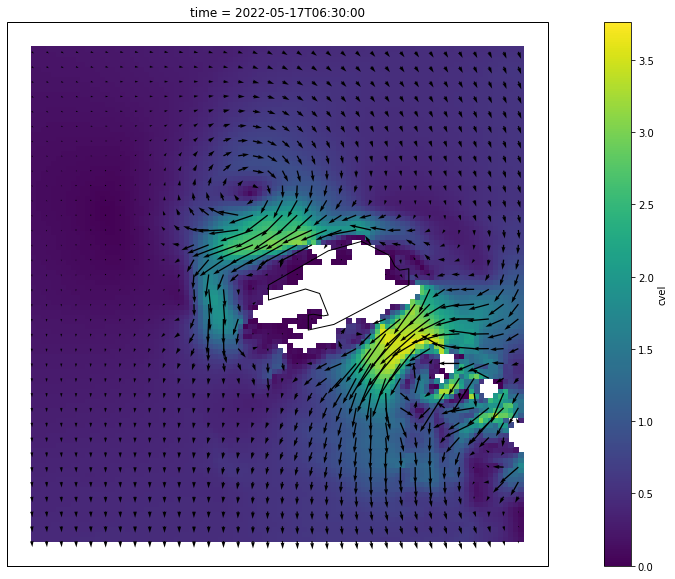

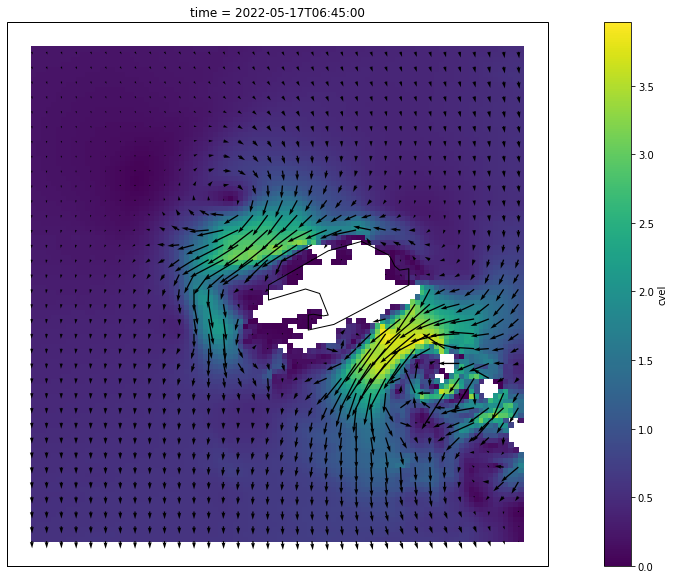

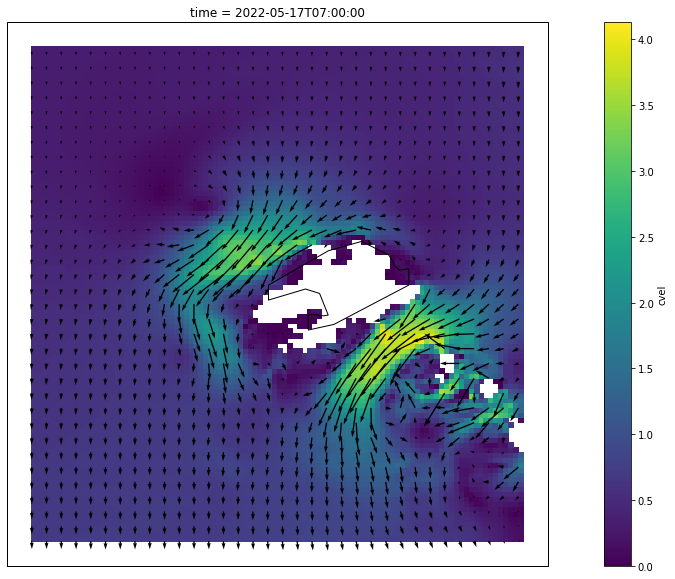

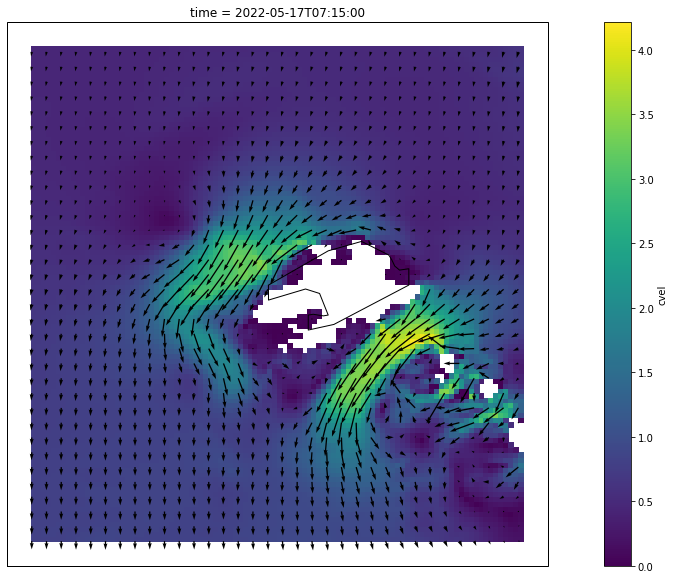

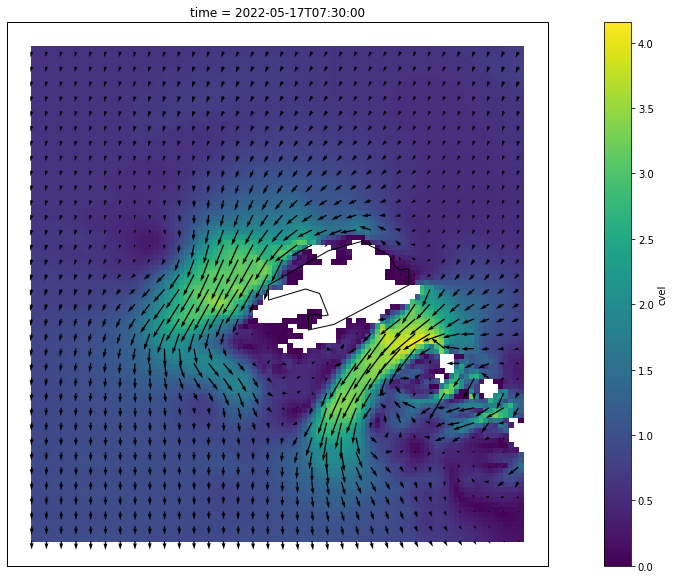

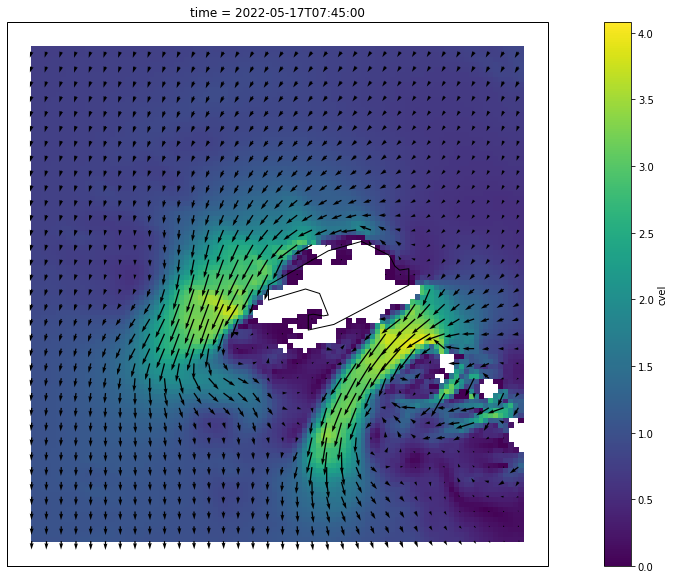

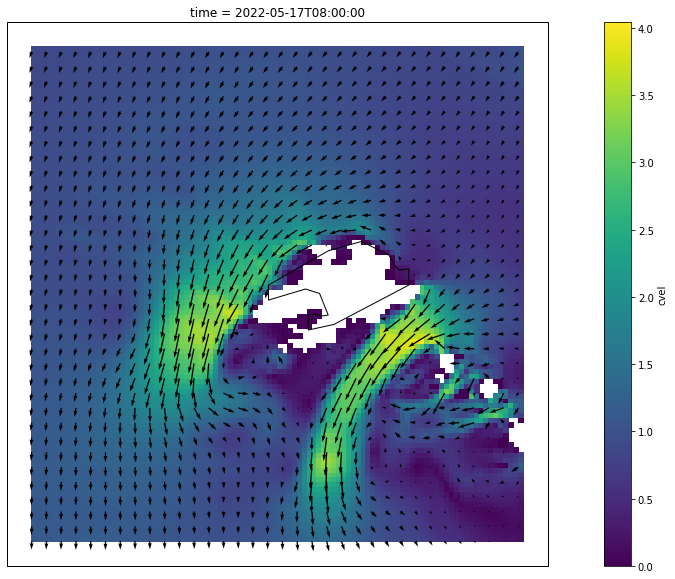

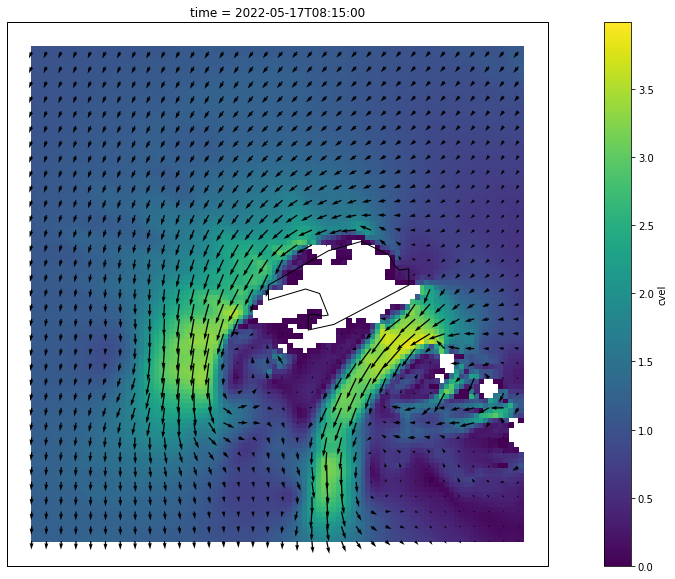

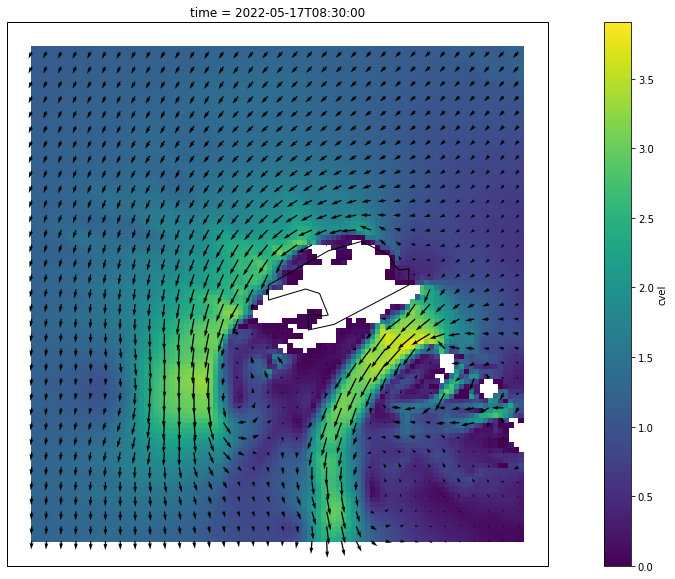

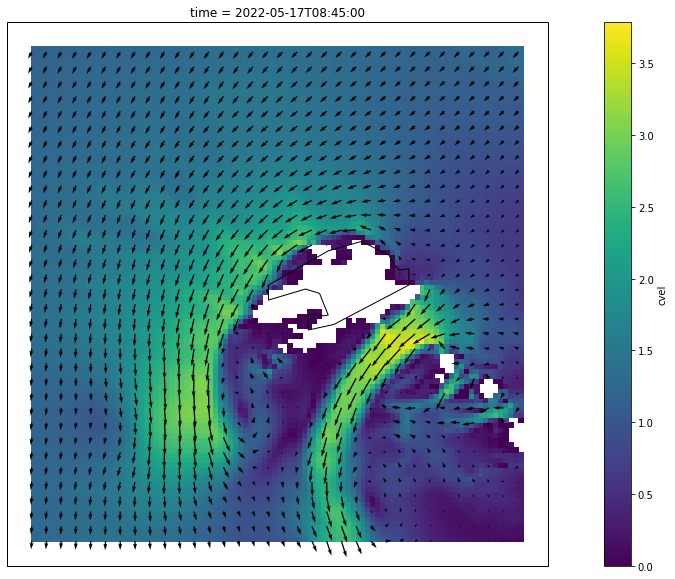

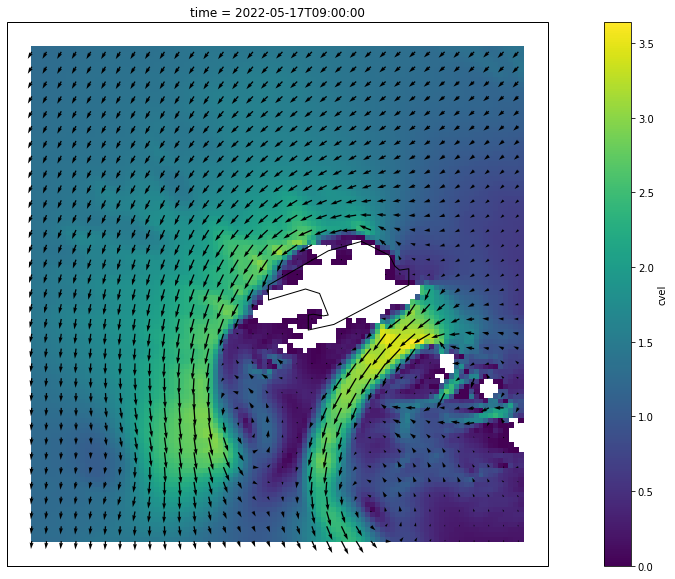

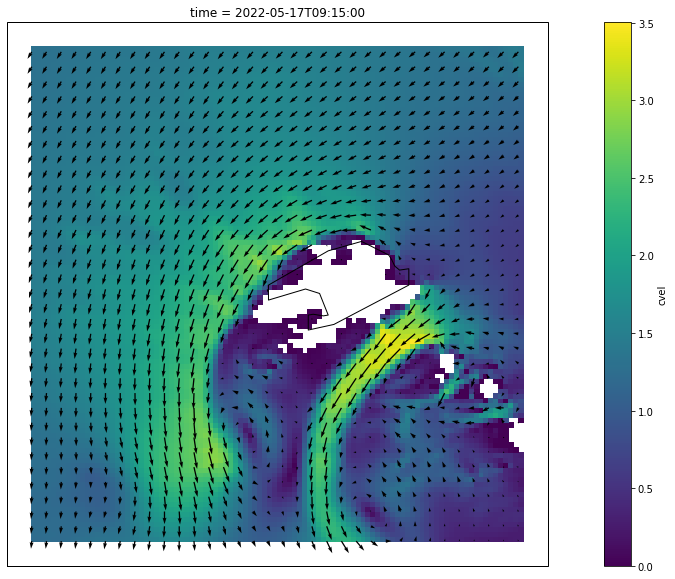

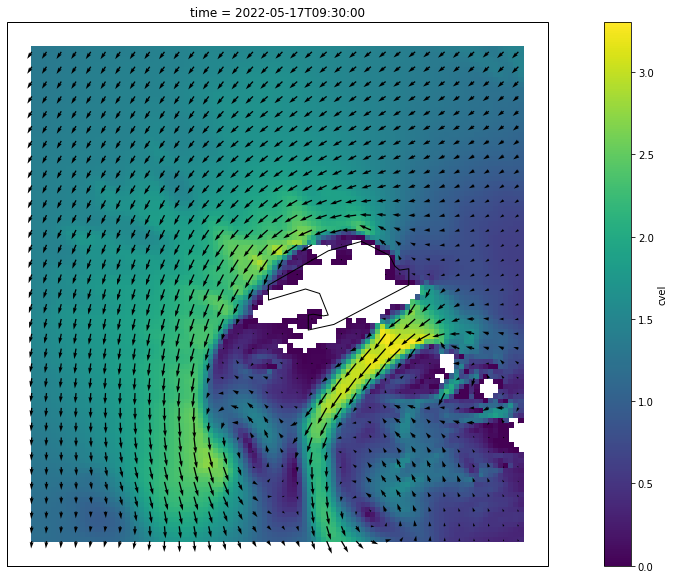

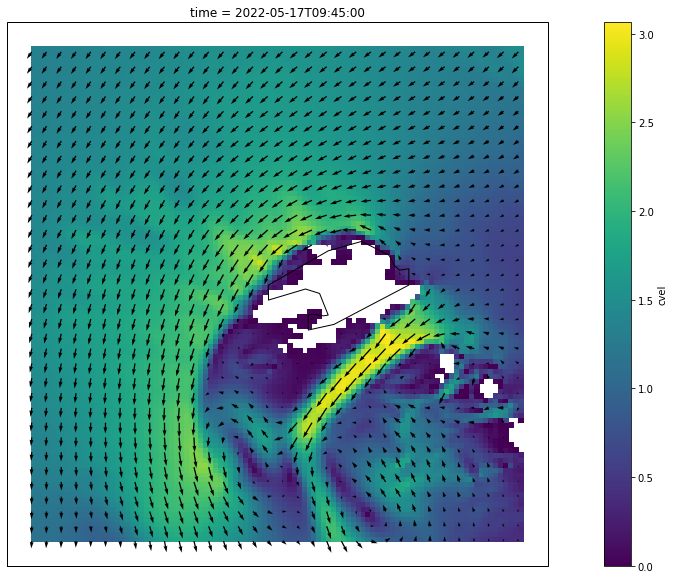

In [36]:
# L1.isel(time=0)\
#     .sel(ni=slice(100,200), nj=slice(450,550))\
#     .plot.quiver(
#         x='longitude', y='latitude',
#         u='U_c', v='V_c'
# )
# => ERROR AttributeError: '_Dataset_PlotMethods' object has no attribute 'quiver'
vector_density=3

for tt in range(len(L1.time)):
    L1s = L1.isel(time=tt).sel(ni=slice(100,200), nj=slice(450,550))
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
    L1s.cvel\
        .plot(
            x='longitude', y='latitude',
            transform=ccrs.PlateCarree(),
    )
    plt.quiver(
        L1s.longitude.data[::vector_density, ::vector_density],
        L1s.latitude.data[::vector_density, ::vector_density],
        L1s.U_c.data[::vector_density, ::vector_density],
        L1s.V_c.data[::vector_density, ::vector_density],
        transform=ccrs.PlateCarree(),
    )
    ax.coastlines(resolution='10m')

## Waves WW3

In [19]:
W3 = xr.open_dataset(
    aux_data_folder + folder + list17['W3']
)
W3.coords['longitude'] = W3.longitude
W3.coords['latitude'] = W3.latitude

In [28]:
W3.longitude.max()

<xarray.DataArray 'longitude' ()>
array(4.716402, dtype=float32)

ValueError: Cannot specify both x and y kwargs for line plots.

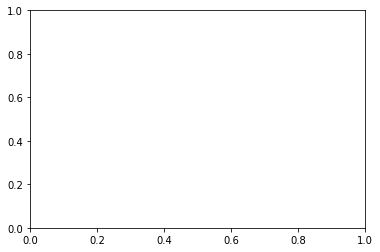

In [25]:
W3.ucur.isel(time=0).plot(
    x='longitude', y='latitude',
)

In [20]:
W3

<xarray.Dataset>
Dimensions:    (element: 214292, node: 110804, noel: 3, time: 3)
Coordinates:
    longitude  (node) float32 ...
    latitude   (node) float32 ...
  * time       (time) datetime64[ns] 2022-05-17T07:00:00 ... 2022-05-17T09:00:00
Dimensions without coordinates: element, node, noel
Data variables:
    tri        (element, noel) int32 ...
    MAPSTA     (node) int16 ...
    dpt        (time, node) float32 ...
    ucur       (time, node) float32 ...
    vcur       (time, node) float32 ...
    uwnd       (time, node) float32 ...
    vwnd       (time, node) float32 ...
    wlv        (time, node) float32 ...
    hs         (time, node) float32 ...
    lm         (time, node) float32 ...
    t02        (time, node) float32 ...
    t01        (time, node) float32 ...
    fp         (time, node) float32 ...
    dir        (time, node) float32 ...
    spr        (time, node) float32 ...
    dp         (time, node) float32 ...
    phs0       (time, node) float32 ...
    phs1       (time, node) float32 ...
    phs2       (time, node) float32 ...
    phs3       (time, node) float32 ...
    phs4       (time, node) float32 ...
    phs5       (time, node) float32 ...
    ptp0       (time, node) float32 ...
    ptp1       (time, node) float32 ...
    ptp2       (time, node) float32 ...
    ptp3       (time, node) float32 ...
    ptp4       (time, node) float32 ...
    ptp5       (time, node) float32 ...
    pdir0      (time, node) float32 ...
    pdir1      (time, node) float32 ...
    pdir2      (time, node) float32 ...
    pdir3      (time, node) float32 ...
    pdir4      (time, node) float32 ...
    pdir5      (time, node) float32 ...
    pws0       (time, node) float32 ...
    pws1       (time, node) float32 ...
    pws2       (time, node) float32 ...
    pws3       (time, node) float32 ...
    pws4       (time, node) float32 ...
    pws5       (time, node) float32 ...
    tws        (time, node) float32 ...
    uust       (time, node) float32 ...
    vust       (time, node) float32 ...
    cha        (time, node) float32 ...
    cge        (time, node) float32 ...
    faw        (time, node) float32 ...
    utaw       (time, node) float32 ...
    vtaw       (time, node) float32 ...
    utwa       (time, node) float32 ...
    vtwa       (time, node) float32 ...
    wcc        (time, node) float32 ...
    utwo       (time, node) float32 ...
    vtwo       (time, node) float32 ...
    foc        (time, node) float32 ...
    utus       (time, node) float32 ...
    vtus       (time, node) float32 ...
    uuss       (time, node) float32 ...
    vuss       (time, node) float32 ...
    uabr       (time, node) float32 ...
    vabr       (time, node) float32 ...
    uubr       (time, node) float32 ...
    vubr       (time, node) float32 ...
    mssu       (time, node) float32 ...
    mssc       (time, node) float32 ...
    mssd       (time, node) float32 ...
Attributes:
    WAVEWATCH_III_version_number:     7.00
    WAVEWATCH_III_switches:           F90 NOGRB NC4 SCRIP SCRIPNC SHRD PR3 UQ...
    SIN4 namelist parameter BETAMAX:  1.5
    data_type:                        OCO unstructured grid
    format_version:                   1.1
    title:                            WAVEWATCH-III FORECAST
    Conventions:                      CF-1.5
    netcdf_version:                   4.4.4
    product_name:                     MARC_WW3-NORGAS-UG_20220517T07Z.nc
    software_version:                 v20191010_tidecflbound/exe_tidecflbound...
    references:                       http://wwz.ifremer.fr/iowaga/
    source:                           MODEL WAVEWATCH III (R) NORGAS-UG
    comment:                          
    area:                             NORGAS-200m-UNST
    easting:                          longitude
    northing:                         latitude
    grid_projection:                  n/a
    southernmost_latitude:            43.
    northernmost_latitude:            53.
    latitude_resolution:              n/a
    westernmos

## Meteo-France Wind

In [53]:
MF = xr.open_dataset(
    aux_data_folder + list17['MF']
)
MF = MF.squeeze()

In [54]:
wspd, wdir = ss.utils.tools.windUV2SpeedDir(MF.u10m.data, MF.v10m.data)
MF['wspd'] = ( ('time','latitude','longitude'), wspd )
MF['wdir'] = ( ('time','latitude','longitude'), wdir )

In [55]:
MF

<xarray.Dataset>
Dimensions:    (latitude: 281, longitude: 321, time: 3)
Coordinates:
  * time       (time) datetime64[ns] 2022-05-17T07:00:00 ... 2022-05-17T09:00:00
  * latitude   (latitude) float32 43.0 43.025 43.05 43.075 ... 49.95 49.975 50.0
  * longitude  (longitude) float32 -8.0 -7.975 -7.95 -7.925 ... -0.05 -0.025 0.0
    height     float32 0.0
Data variables:
    hu2m       (time, latitude, longitude) float32 ...
    nebul      (time, latitude, longitude) float32 ...
    pmer       (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    u10m       (time, latitude, longitude) float32 -0.08507633 ... -0.32611465
    v10m       (time, latitude, longitude) float32 6.0631914 ... 0.40923023
    wspd       (time, latitude, longitude) float32 6.0637884 ... 0.5232783
    wdir       (time, latitude, longitude) float32 179.1961 ... 141.44873
Attributes:
    data_type:               OCO straight grid
    format_version:          1.2
    title:                   Meteo-France Arome analysis and forecast
    Conventions:             CF-1.3
    netcdf_version:          3.5
    product_name:            METEOFRANCE_AROME_20220517T07Z.nc
    creation_date:           2022-05-17T11:22:45Z
    product_version:         1.0
    software_version:         
    references:              http://www.meteo.fr/
    history:                 2022-05-17T11:22:45Z : Creation
    source:                  Meteo-France Arome
    comment:                  
    area:                    Western Europe
    easting:                 longitude
    northing:                latitude
    grid_projection:         n/a
    southernmost_latitude:   38
    northernmost_latitude:   53
    latitude_resolution:     0.025
    westernmost_longitude:   -8
    easternmost_longitude:   12
    longitude_resolution:    0.025
    minimum_altitude:        0 m
    maximum_altitude:        0 m
    altitude_resolution:     n/a
    start_date:              2022-05-17T07:00:00Z
    stop_date:               2022-05-17T07:00:00Z
    field_type:              hourly
    run_time:                2022-05-17T06:00:00Z
    forecast_range:          30-hours forecast
    forecast_type:           forecast
    institution:             Meteo-France
    institution_references:  http://www.meteo.fr/
    data_centre:             CD-OCO
    data_centre_references:  http://www.previmer.org/
    contact:                 cdoco-exploit@ifremer.fr
    distribution_statement:  Data restrictions: for registered users only
    operational_status:      operational
    quality_index:           1

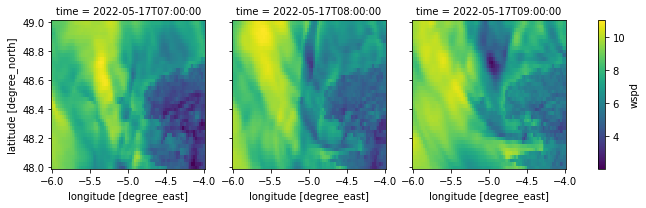

In [59]:
MFs = MF.sel(latitude=slice(48,49), longitude=slice(-6,-4))
MFs.wspd.plot(col='time')

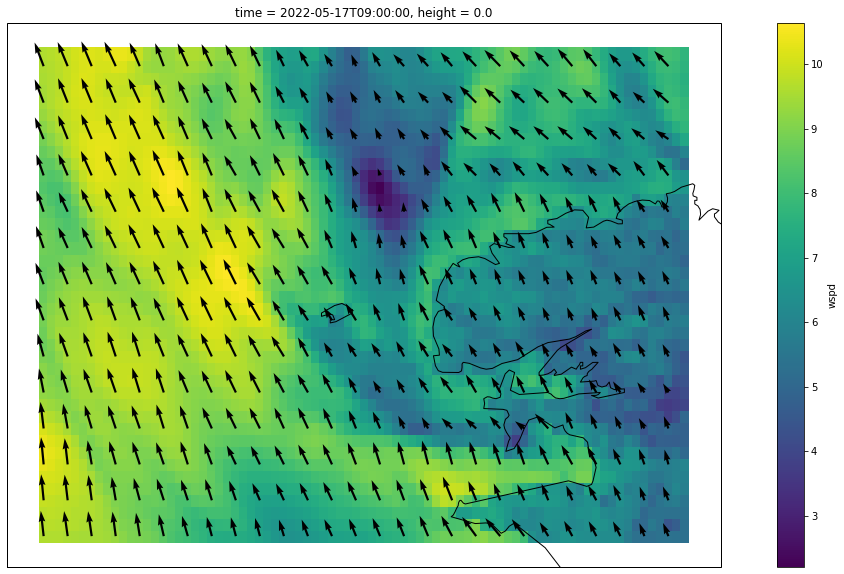

In [66]:
vector_density=3

MFss = MFs.isel(time=-1)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
MFss\
    .wspd\
    .plot(
        x='longitude', y='latitude',
        transform=ccrs.PlateCarree(),
)
plt.quiver(
    MFss.longitude.data[::vector_density],
    MFss.latitude.data[::vector_density],
    MFss.u10m.data[::vector_density, ::vector_density],
    MFss.v10m.data[::vector_density, ::vector_density],
    transform=ccrs.PlateCarree(),
)
ax.coastlines(resolution='10m')